In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./TestEvents_energyEast_lt_200_energyWest_gt_1000_Dec12.root")
tcomp = f.Get("evwTree")

In [3]:
#f.ls()

In [4]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :     4582 : Total =         1871612 bytes  File  Size =     723520 *
*        :          : Tree compression factor =   2.57                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :     4582 : Total  Size=      18893 bytes  File Size  =       5685 *
*Baskets :        1 : Basket Size=    2491904 bytes  Compression=   3.24     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :     4582 : Total  Size=      18908 bytes  File Size  =       8379 *
*Baskets :        1 : Basket Size=    2491904 bytes  Compression=   2.20     *
*...................................................

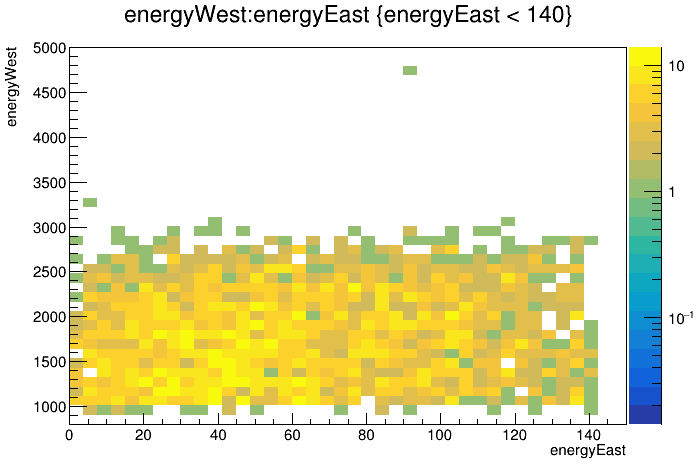

In [5]:
c = r.TCanvas()
tcomp.Draw("energyWest:energyEast","energyEast < 140","colz")
c.SetLogz()
c.Draw()

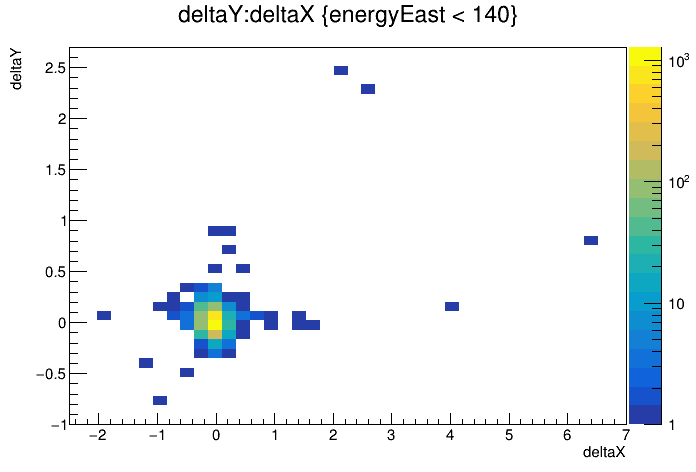

In [6]:
c = r.TCanvas()
tcomp.Draw("deltaY:deltaX","energyEast < 140","colz")
c.SetLogz()
c.Draw()

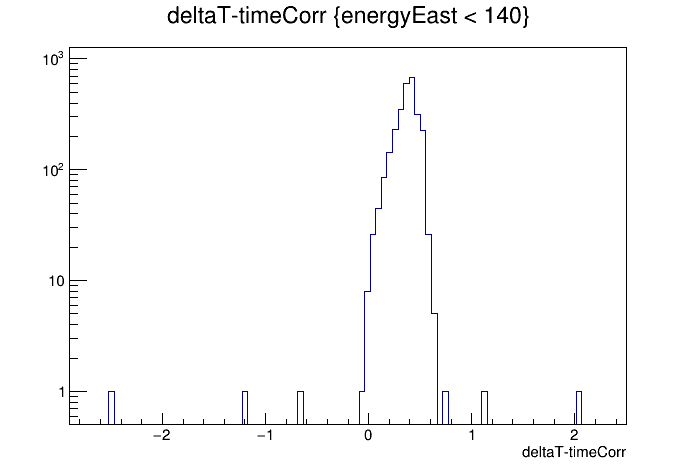

In [7]:
c = r.TCanvas()
tcomp.Draw("deltaT-timeCorr","energyEast < 140","colz")
c.SetLogy()
c.Draw()

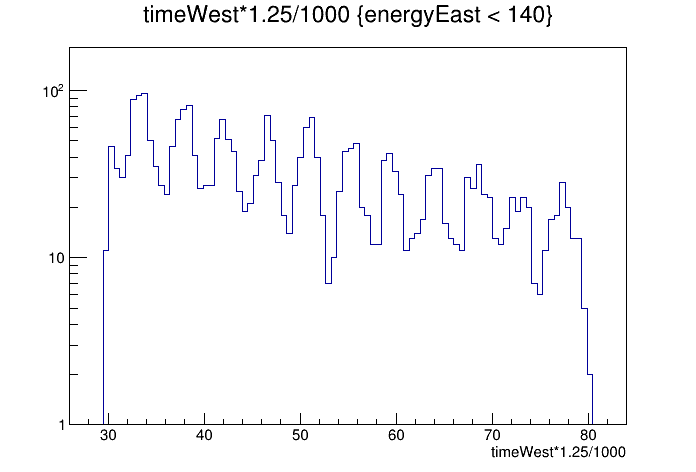

In [8]:
c = r.TCanvas()
tcomp.Draw("timeWest*1.25/1000","energyEast < 140","colz")
c.SetLogy()
c.Draw()

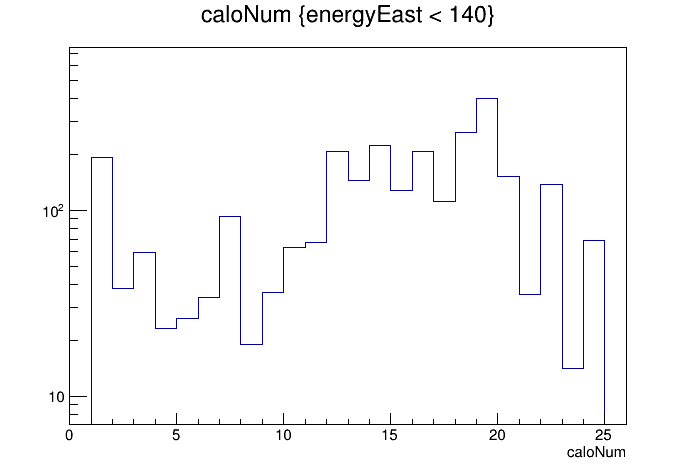

In [9]:
c = r.TCanvas()
tcomp.Draw("caloNum","energyEast < 140","")
c.SetLogy()
c.Draw()

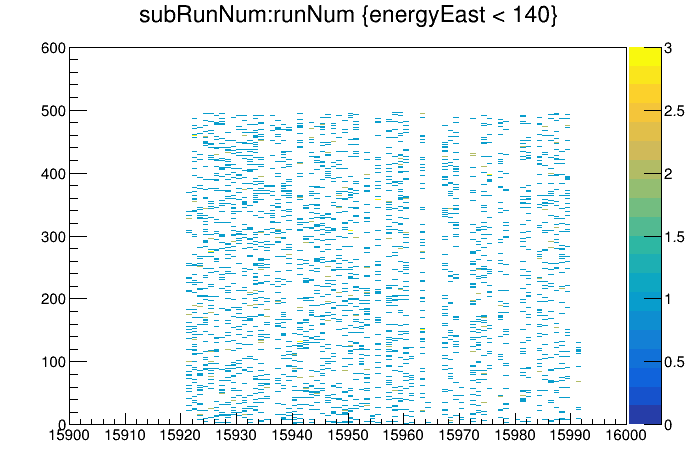

In [10]:
c = r.TCanvas()
tcomp.Draw("subRunNum:runNum>>(100,15900,16000,600,0,600)","energyEast < 140","colz")
c.Draw()

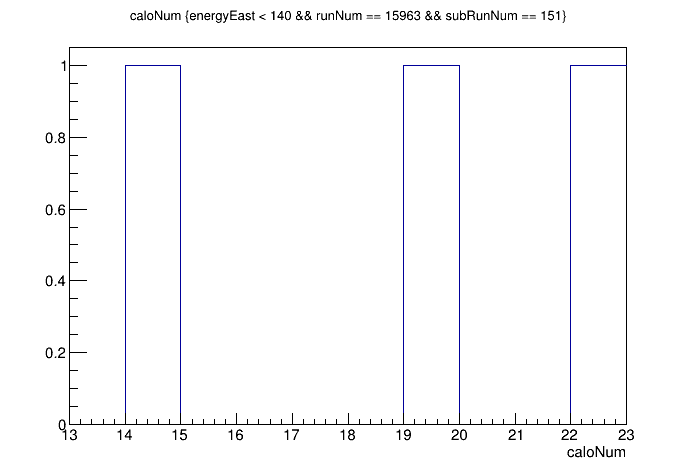

In [11]:
c = r.TCanvas()
tcomp.Draw("caloNum","energyEast < 140 && runNum == 15963 && subRunNum == 151","")
c.SetLogz()
c.Draw()

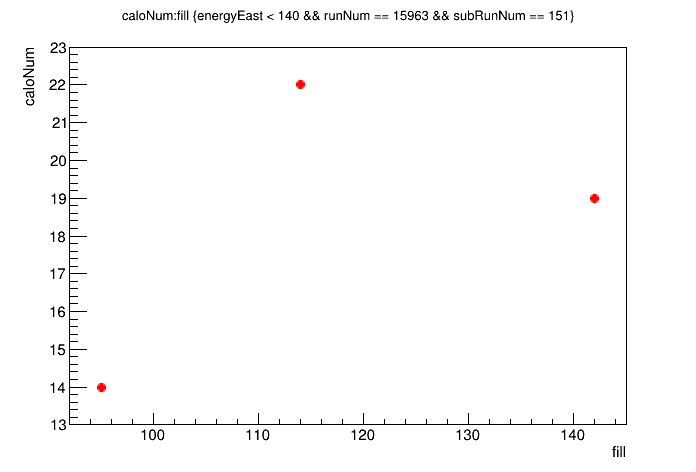

In [12]:
c = r.TCanvas()
tcomp.SetMarkerColor(2)
tcomp.SetMarkerStyle(8)
tcomp.Draw("caloNum:fill","energyEast < 140 && runNum == 15963 && subRunNum == 151","")
c.SetLogz()
c.Draw()

c = r.TCanvas("c","c",6000,4000)
c.Divide(6,4)
for calo in range(6*4):
    c.cd(calo+1)
    tcomp.Draw("energyWest:energyEast","caloNum=="+str(calo+1),"")
c.Draw()

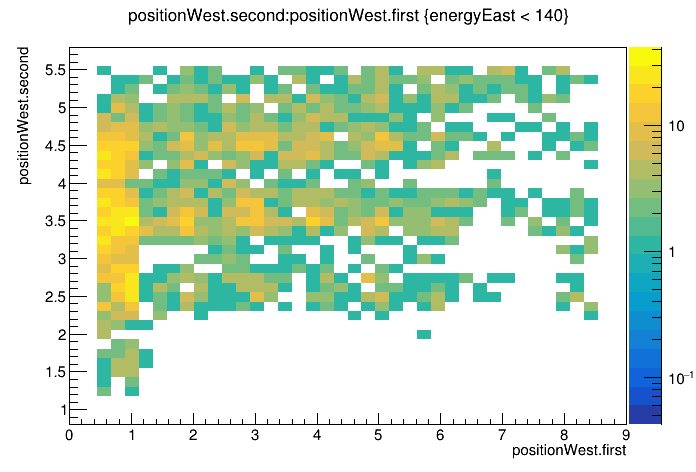

In [6]:
c = r.TCanvas()
tcomp.Draw("positionWest.second:positionWest.first","energyEast < 140","colz")
c.SetLogz()
c.Draw()

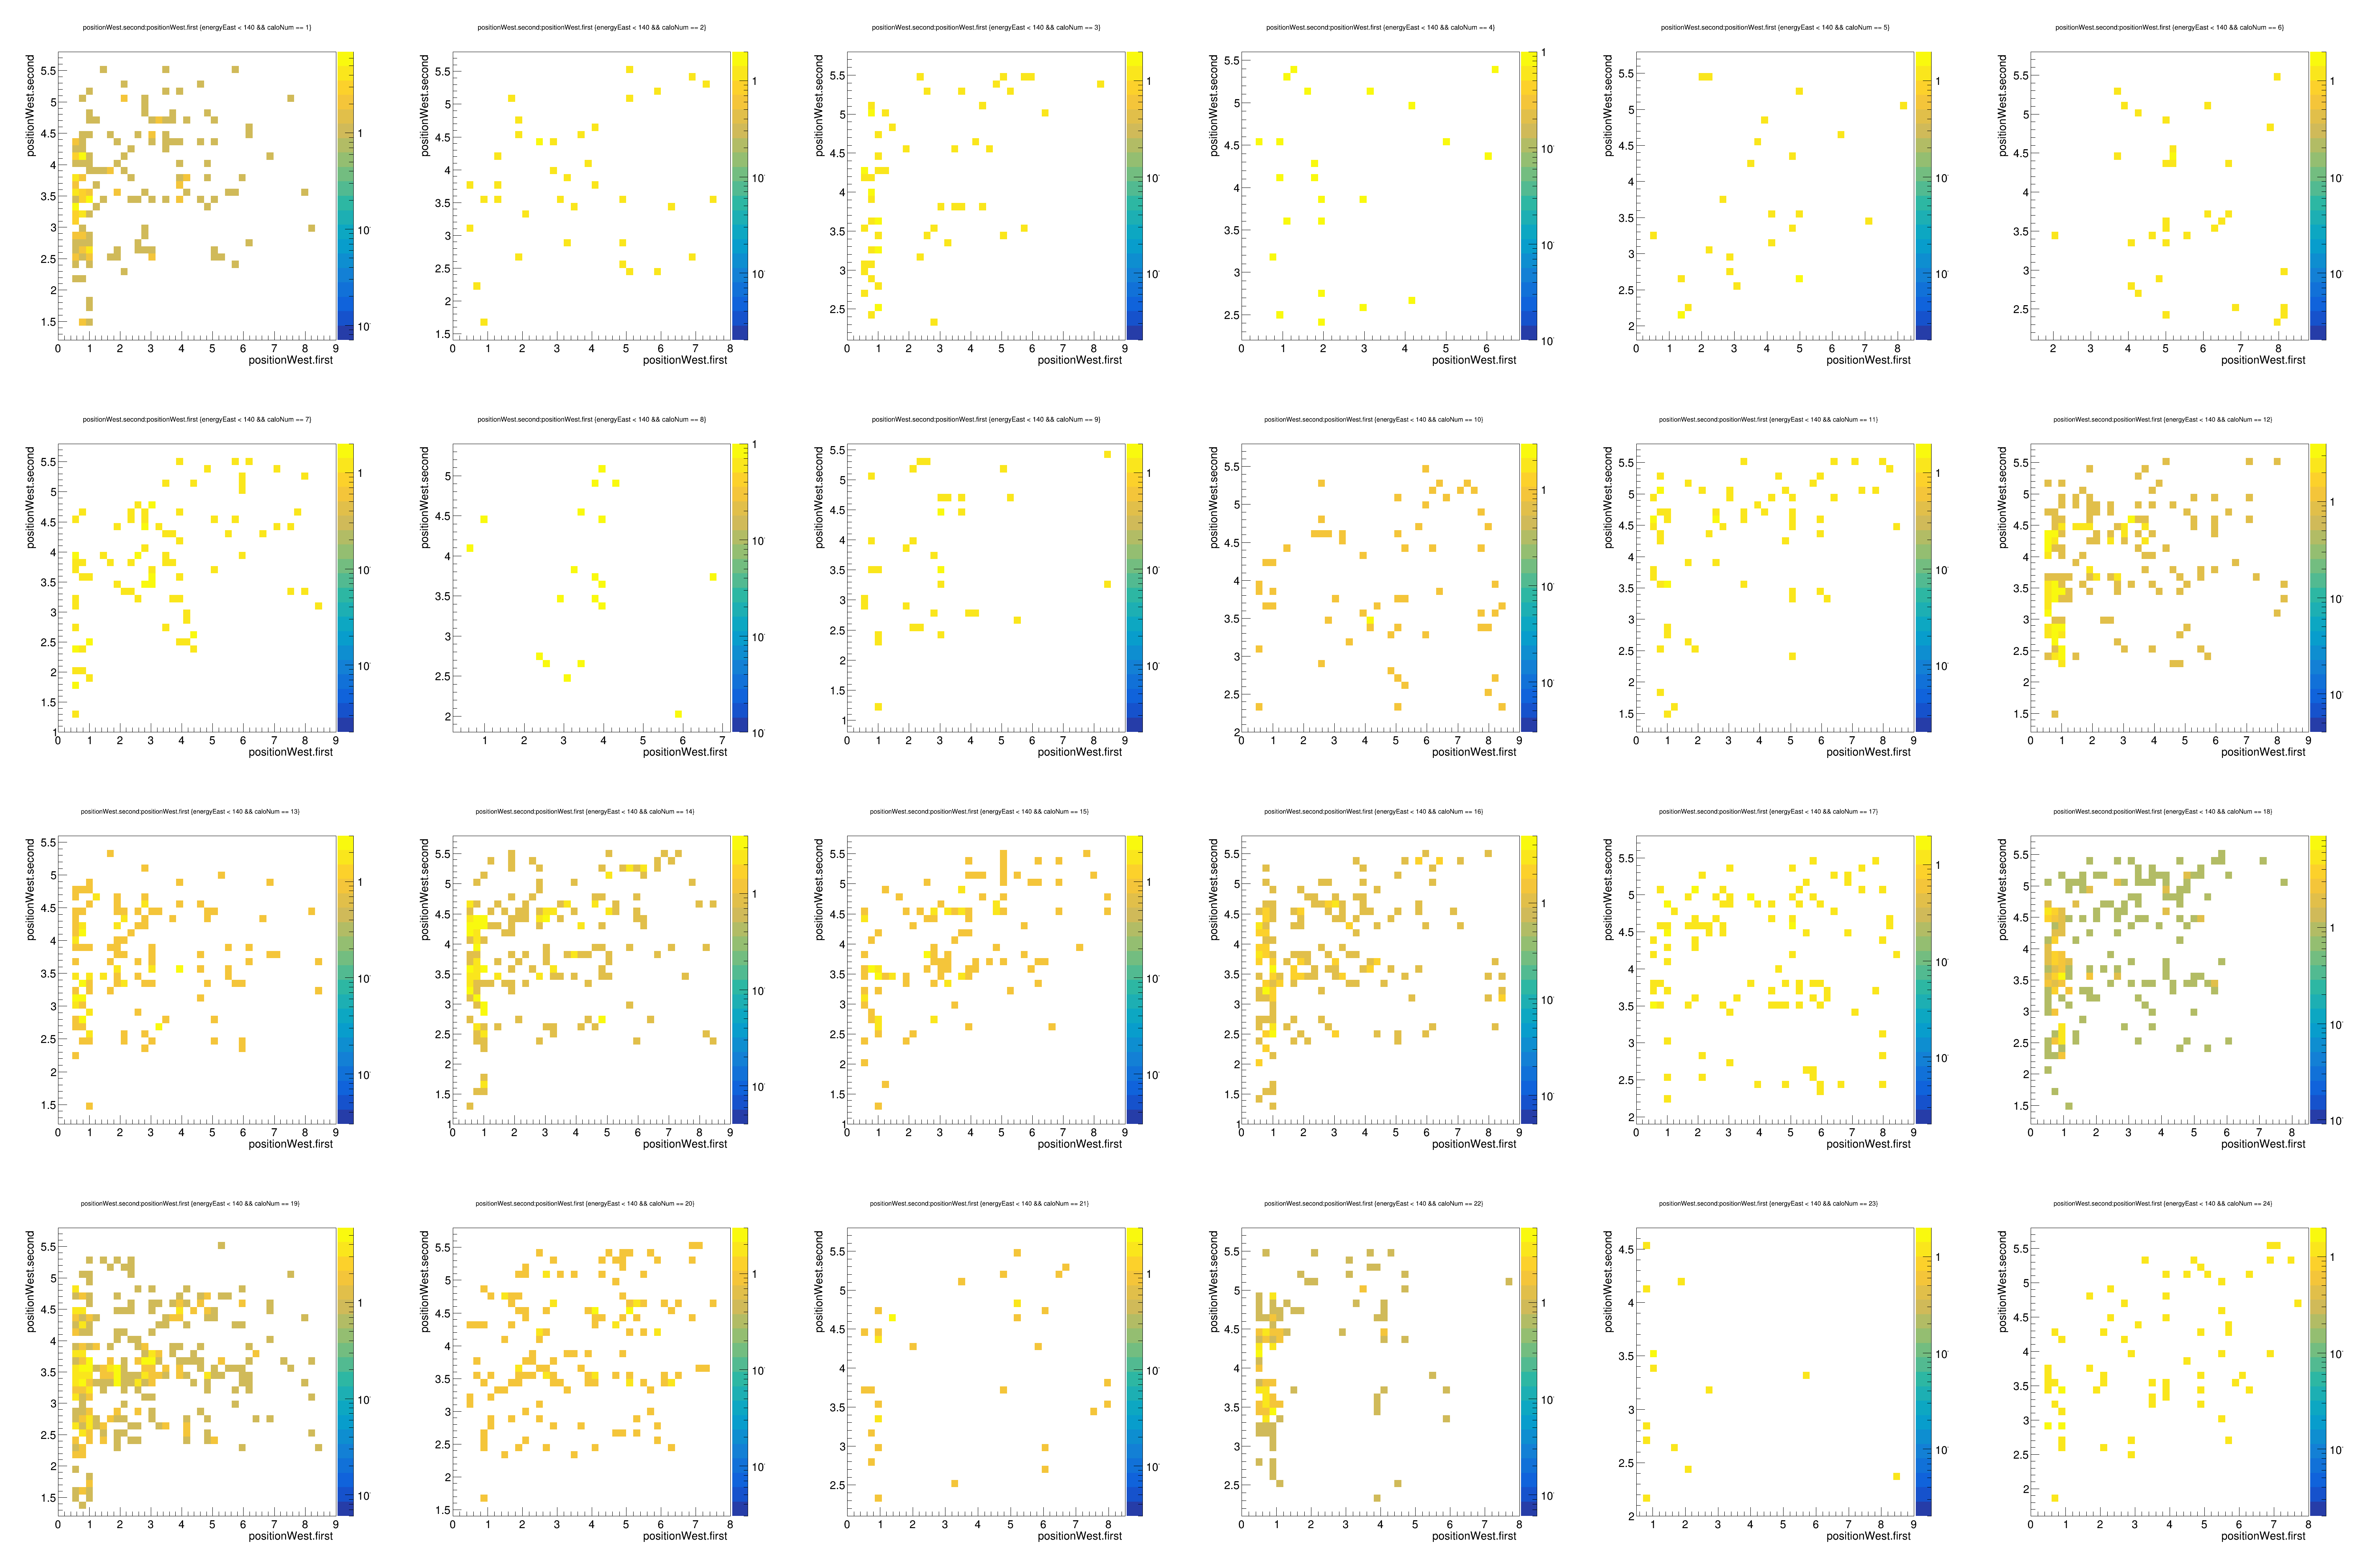

In [7]:
c = r.TCanvas("c","c",6000,4000)
c.Divide(6,4)
for calo in range(6*4):
    c.cd(calo+1)
    tcomp.Draw("positionWest.second:positionWest.first","energyEast < 140 && caloNum == "+str(calo+1),"colz")
    r.gPad.SetLogz()
c.Draw()

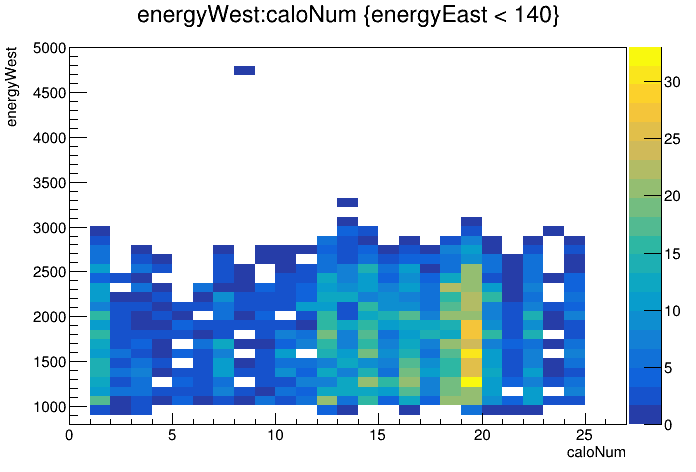

In [8]:
c = r.TCanvas()
tcomp.Draw("energyWest:caloNum","energyEast < 140","colz")
c.Draw()

In [14]:
fwave = r.TFile("/home/jlab/g-2/eastVsWest/earlyLateComparison/waveforms_15963_00151.root")
tcomp = fwave.Get("islands").Get("islands").Get("islandTree")

In [15]:
tcomp.Print()

******************************************************************************
*Tree    :islandTree: Tree of xtal traces                                    *
*Entries :   325408 : Total =      1665594326 bytes  File  Size =  736192884 *
*        :          : Tree compression factor =   2.26                       *
******************************************************************************
*Br    0 :xtal0     : vector<short>                                          *
*Entries :   325408 : Total  Size=   30640579 bytes  File Size  =   13102699 *
*Baskets :      134 : Basket Size=    1336320 bytes  Compression=   2.34     *
*............................................................................*
*Br    1 :xtal1     : vector<short>                                          *
*Entries :   325408 : Total  Size=   30640579 bytes  File Size  =   13213685 *
*Baskets :      134 : Basket Size=    1336320 bytes  Compression=   2.32     *
*...................................................